In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pf
%matplotlib inline

In [2]:
data = pd.read_csv('creditcard.csv')

In [ ]:
pf.ProfileReport(data)

In [ ]:
data['Class'].value_counts().plot.bar()

In [ ]:
print('Proportion of the classes in the data:')
data.Class.value_counts()/len(data)

In [5]:
X = np.array(data.loc[:, data.columns!='Class'])
y = np.array(data.loc[:, data.columns=='Class']).reshape(-1,1)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 2, shuffle = True, stratify = y)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(solver='lbfgs')

# Without SMOTE

In [9]:
clf.fit(X_train, y_train.ravel())
#predicting training datset
train_pred = clf.predict(X_train)
#predicting testing datset
test_pred = clf.predict(X_test)

In [10]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred, y_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred, y_test))

Accuracy score for Training Dataset =  0.9991353107640708
Accuracy score for Testing Dataset =  0.9993190547628927


In [11]:
from sklearn.metrics import confusion_matrix
print('Confusion Matrix - Training Dataset')
confusion_matrix(y_train.ravel(), train_pred)

Confusion Matrix - Training Dataset


array([[190459,     31],
       [   134,    196]], dtype=int64)

In [12]:
print(pd.crosstab(y_train.ravel(), train_pred, rownames = ['True'], colnames = ['Predicted'], margins = True))

Predicted       0    1     All
True                          
0          190459   31  190490
1             134  196     330
All        190593  227  190820


In [13]:
134/330

0.40606060606060607

That is a whopping 41%! We are classifying 41% of the fraud cases as not fraud. This is going to cost some serious losses to the credit card company. You can observe this similarly in the confusion matrix of the Testing Dataset.

The higher accuracy is not due to correct classification. The model has predicted the majority class for almost all the examples. And since about 99.8% of the examples actually belong to this class, it leads to such high accuracy scores.

In [14]:
print('Confusion Matrix - Testing Dataset')
print(pd.crosstab(y_test.ravel(), test_pred.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Testing Dataset
Predicted      0    1    All
True                        
0          93815   10  93825
1             54  108    162
All        93869  118  93987



55 out of 162 instances which belong to class 1 have been classifed as class 0. We are missing about 34% of the fraud cases.

# Using SMOTE

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, n_jobs=-1)

In [19]:
X_train.shape

(190820, 30)

In [20]:
X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())

In [21]:
X_train_new.shape

(380980, 30)

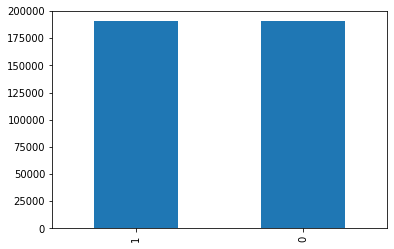

In [22]:
# observe that data has been balanced
pd.Series(y_train_new).value_counts().plot.bar()

In [23]:
# fit the model
clf.fit(X_train_new, y_train_new)

# prediction for Training data
train_pred_sm = clf.predict(X_train_new)

# prediction for Testing data
test_pred_sm = clf.predict(X_test)

In [24]:
print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))

Accuracy score for Training Dataset =  0.9428841408997848
Accuracy score for Testing Dataset =  0.9729962654409653


In [25]:
print('Confusion Matrix - Training Dataset')
print(pd.crosstab(y_train_new, train_pred_sm, rownames = ['True'], colnames = ['Predicted'], margins = True))

Confusion Matrix - Training Dataset
Predicted       0       1     All
True                             
0          185383    5107  190490
1           16653  173837  190490
All        202036  178944  380980


In [26]:
16685/190490

0.08758989973226941

Roughly 7.4% of the fraud classes have been classified as not fraud.

Conclusion
One might argue that the reduced accuracy is an indicator of lower model performance. However, this is not true.

Error in prediction can be made in two ways:

Classifying not fraud as fraud
Classifying fraud as not fraud
It should not be hard to understand that the second error is costlier than the first.

The objective of each classification problem is different. So make sure to evaluate each model with respect to its own objective instead of merely judging it on its accuracy.